In [568]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath("../src"))

import importlib
import klimagass_visualisering
importlib.reload(klimagass_visualisering)
import statistikk
importlib.reload(statistikk)

<module 'statistikk' from 'c:\\Users\\johan\\Documents\\Mappe\\src\\statistikk.py'>

c:\Users\johan\Documents\Mappe\src\temp_visualisering.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_df, x="tiår", y="gjennomsnitt", palette="Blues_d")


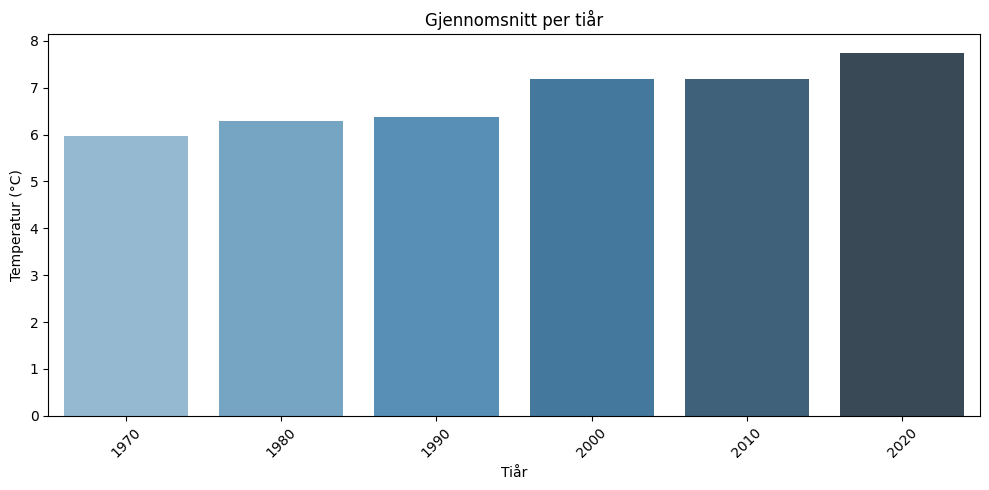

In [569]:
# Visualisering av årlig temperatur
from temp_visualisering import plot_interactive_bokeh
from statistikk import analyser_fil

stat_dict, _, _ = analyser_fil(
    filsti="../data/temp_gloshaugen_historisk_renset_ 50.csv",
    sep=",",
    datokolonne="tidspunkt",
    groupby="år"
)

årlig_df = stat_dict["temperatur"]
årlig_df = årlig_df[årlig_df["år"] < 2025]

plot_interactive_bokeh(årlig_df)

In [ ]:
# Visualisering av gjennomsnittstemperatur per tiår
from statistikk import tiår_snitt
from temp_visualisering import plot_by_decade

filtrert_df = årlig_df[årlig_df["år"] < 2025]
tiår_df = tiår_snitt(filtrert_df, årskolonne="år", verdikolonne="gjennomsnitt")
plot_by_decade(tiår_df)

# Analyse og visualisering av klimagass-utslipp 
I denne analysen ser vi på klimagassutslipp for Norge og verden.

### Importerer nødvendige filer 
Importerer data fra de fersig rensede CSV-filene:
- Norge: `klimagassutslipp_norge_renset.csv`
- Verden: `klimagassutslipp_verden_renset.csv`

Funksjonen analyser_fil() leser inn filene og grupperer etter år.

In [570]:
statistikk_norge, df_total_norge, df_norge_alt = statistikk.analyser_fil("../data/klimagassutslipp_norge_renset.csv", datokolonne="år", groupby="år")
statistikk_verden, df_total_verden, df_verden_alt= statistikk.analyser_fil("../data/klimagassutslipp_verden_renset.csv", datokolonne="År", groupby="år")

### Klargjøring av datasett

For å visualisere sammenlignbare tall blir totale norske utslipp (kunn 'alle kilder') lagret i df_norge, og verdensutslippet lagres i df_verden.
I tillegg lages df_norge_alt, som inneholder utslippene i norge per kilde, der verdien ligger i en kolonne kalt gjennomsnitt.
Alle datasettene df_norge, df_norge_alt og df_verden blir justert slik at de passer funksjonene som brukes videre.

Dette gir følgende datasett:
- df_norge: Totalt utslipp for Norge (alle kilder summert)
- df_norge_alt: Utslipp i Norge per kilde
- df_verden: Totalt utslipp for verden


In [571]:
df_norge = df_total_norge[df_total_norge["kilde_(aktivitet)"].str.lower().str.contains("alle kilder")].copy()
df_norge = df_norge[["år", "utslipp_til_luft_(1_000_tonn_co2-ekvivalenter,_ar5)"]]
df_norge.rename(columns={"utslipp_til_luft_(1_000_tonn_co2-ekvivalenter,_ar5)": "gjennomsnitt"}, inplace=True)

df_norge_alt = df_norge_alt.rename(columns={"utslipp_til_luft_(1_000_tonn_co2-ekvivalenter,_ar5)": "gjennomsnitt"})

df_verden = statistikk_verden["utslipp_i_co2_ekvivalenter"]


### Utslipp per år globalt
Utslippene for verden visualiseres som et linjediagram og viser hvordan de totale klimagassutslippene har utviklet seg over tid.

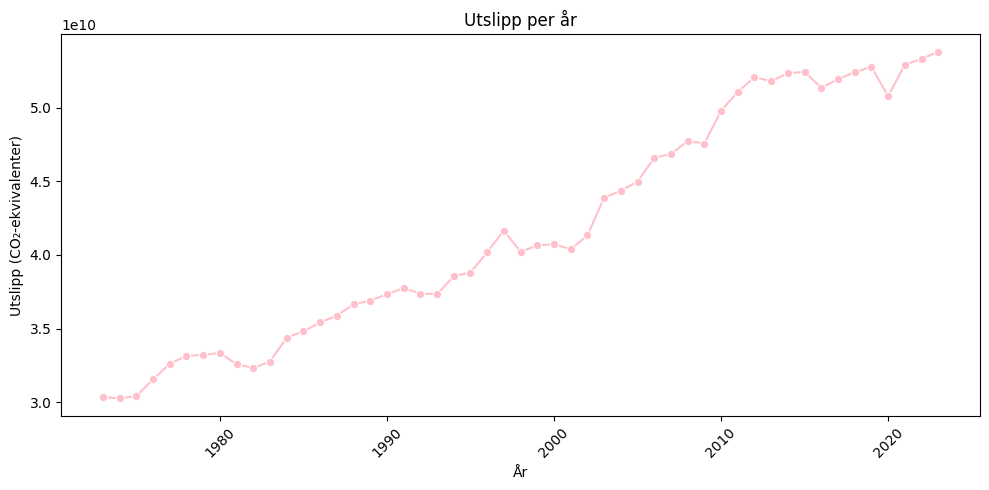

In [572]:
from klimagass_visualisering import plot_utslipp
plot_utslipp(df_verden)

**Kommentar:** 

De globale klimagassutslippene har økt jevnt siden 1970-tallet. I noen perioder er det derimot små fall som rundt 2008 og 2020. Dette skyldes finanskrisen i 2008 og koronapandemien i 2020. 

Finanskrisen i 2008 var en global økonomisk krise som begynte i USA og spredte seg til resten av verden. Under krisen stoppet den økonomiske veksten opp og fabrikkene produsere mindre slik at etterspørselen etter energi ble lavere. Dette førte til en nedgang i klimagass utslipp, men som grafen viser, var dette bare midlertidig og de økte raskt igjen.

I 2020 under koronapandemien var nedgangen i utslipp enda tydeligere. Verdensøkonomien ble delvis stengt ned, folk jobbet mer hjemmefra og reiste mindre. Grafen viser at dette også bare var en midlertidig endring. Etter samfunnet begynte å åpne opp igjen, begynte utslippene å stige. 

Begge disse periodene viser at kriser kan gi midlertidige kutt i utslipp, men at varig reduksjon i utslipp vi kreve omfattende og permanente endringer.

### Utslipp per år i Norge

Totalutslippet for Norge visualiseres som et linjediagram, basert på summen av alle kilder. Dette kontrolleres ved å lage en graf der utslippene summeres manuelt fra alle kilder i datasettet. Resultatene samsvarer, noe som bekrefter at dataen er riktig.

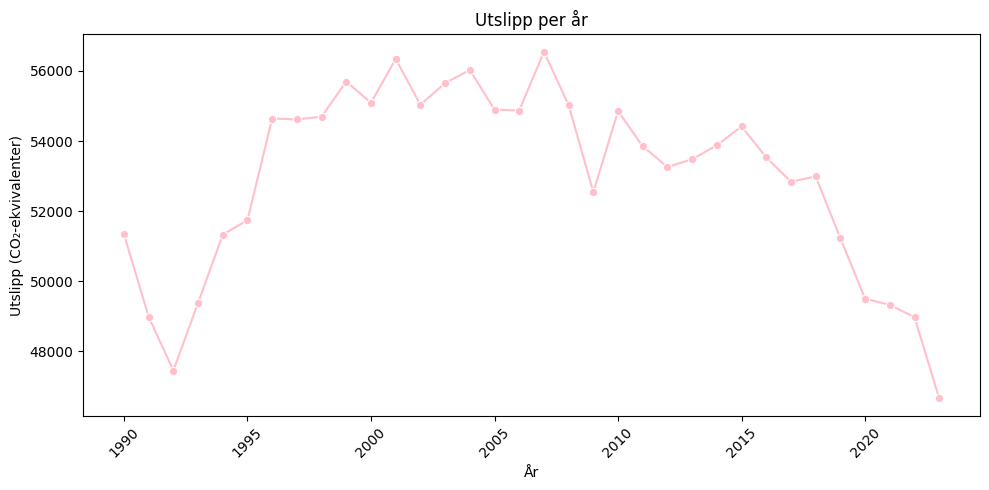

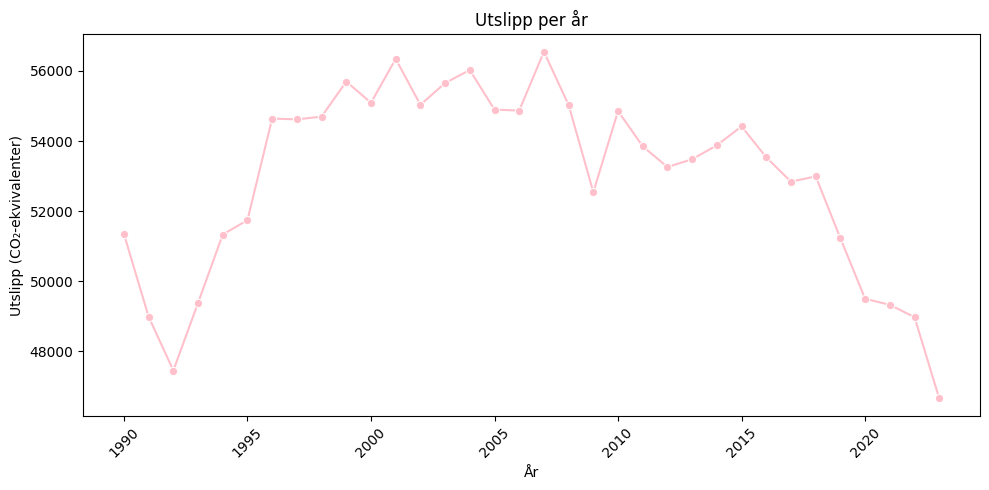

In [573]:
plot_utslipp(df_norge)

# Tester at det blir samme graf når alle kildene summeres i stede for å bruke 'alle kilder' direkte
df = statistikk_norge["utslipp_til_luft_(1_000_tonn_co2-ekvivalenter,_ar5)"]
df_samlet = (df.groupby("år")["gjennomsnitt"].sum().reset_index())
plot_utslipp(df_samlet)

**Kommentar:** 

Utslippene i Norge har økte frem til 2008, men i 2008 var det en tydlig nedgang i klimagassutslipp. Dette er pga. den globale finanskrisen. I 2020 reduseres også utslippene pga. pandemien. Etter pandemien har norske utslipp fortsatt å synke. Dette kan være på grunn av tiltak som elektrifisering og strengere klimaregler.

Det ble laget to grafer for å dobbeltsjekke utslippsdataene. Først ble en graf basert på totalutslipp direkte fra datasettet laget. Deretter ble en ny graf laget ved å summere alle kildene manuelt. Dette ble gjort fordi nedgangen i utslipp, spesielt i 2023, virket overraskende stor. Siden grafene ble like, sammsvarer tallene i som er hentet, selv om det fortsatt er noe usikkerhet hvorfor utslippene i 2023 er så lave som grafen viser.

### Utslipp per tiår

Her vises gjennomsnittlige utslipp per tiår for både Norge og verden. Dette er for å få en jevnere oversikt over utviklingen.

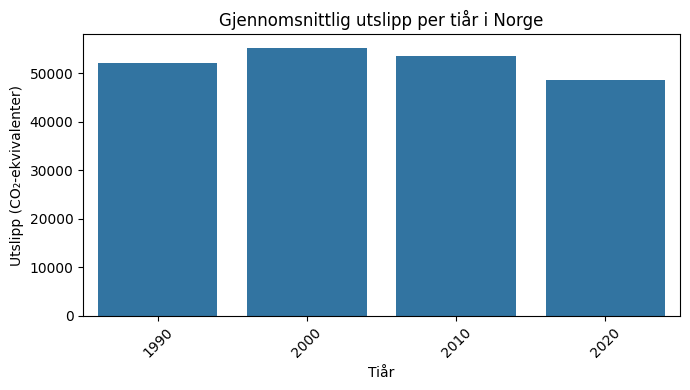

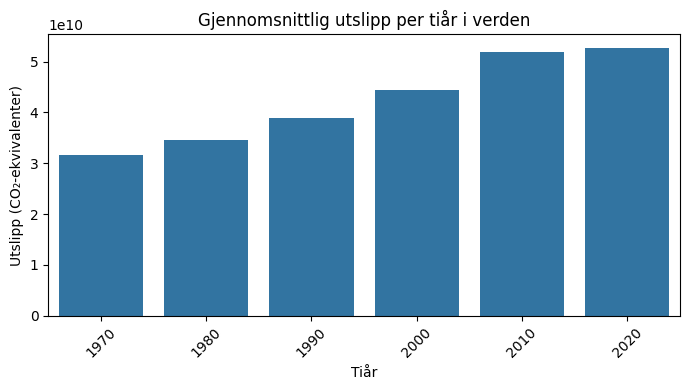

In [574]:
from klimagass_visualisering import plot_utslipp_per_tiar
plot_utslipp_per_tiar(df_norge, tittel="Gjennomsnittlig utslipp per tiår i Norge")
plot_utslipp_per_tiar(df_verden, tittel="Gjennomsnittlig utslipp per tiår i verden")

### Sammenligne utslipp fra Norge og verden
Her vises utviklingen i norske og globale utslipp først i samme graf og så ved siden av hverandre. 
I det første plottet har Norge og verden hver sin y-akse (Norge=venstre og verden=høyre) slik at forskjellen i størrelse ikke blir et problem.

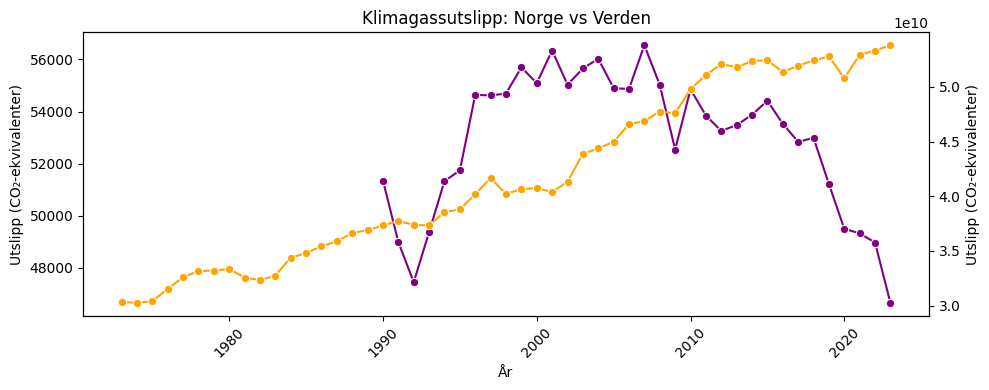

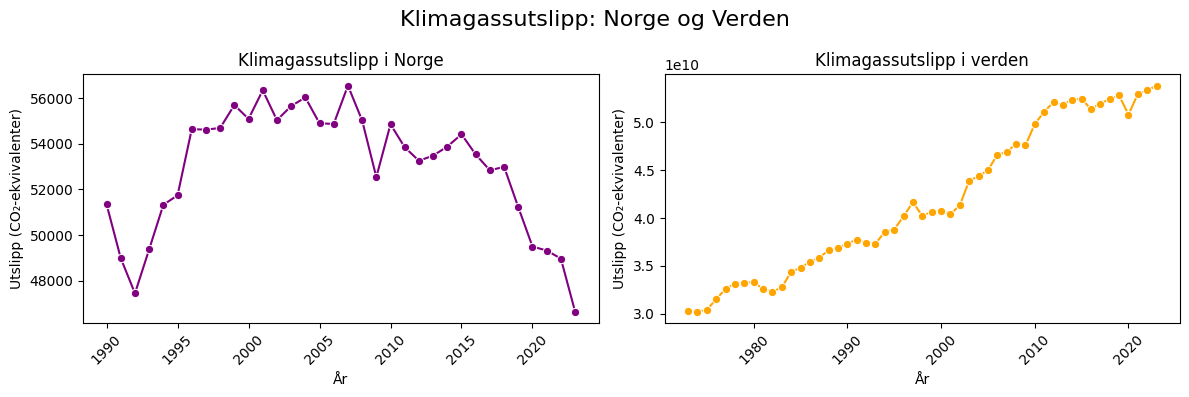

In [575]:
from klimagass_visualisering import plot_norge_og_verden_sammen, plot_norge_og_verden_separat

plot_norge_og_verden_sammen(df_norge, df_verden)
plot_norge_og_verden_separat(df_norge, df_verden)

**Kommentar:** 

Sammenlignet med verdens utslipp er nedgangen i Norge etter 2020 mye kraftigere og varig. Globalt var det en liten nedgang under pandemien, men utslippene økte raskt igjen. Dette kan bety på at Norge har innført varige tiltak for å redusere klimagassutslipp etter pandemien.

## Klimagassutslipp fordelt på kilde

Grafen viser utviklingen i Norges klimagassutslipp fordelt på ulike kilder. 

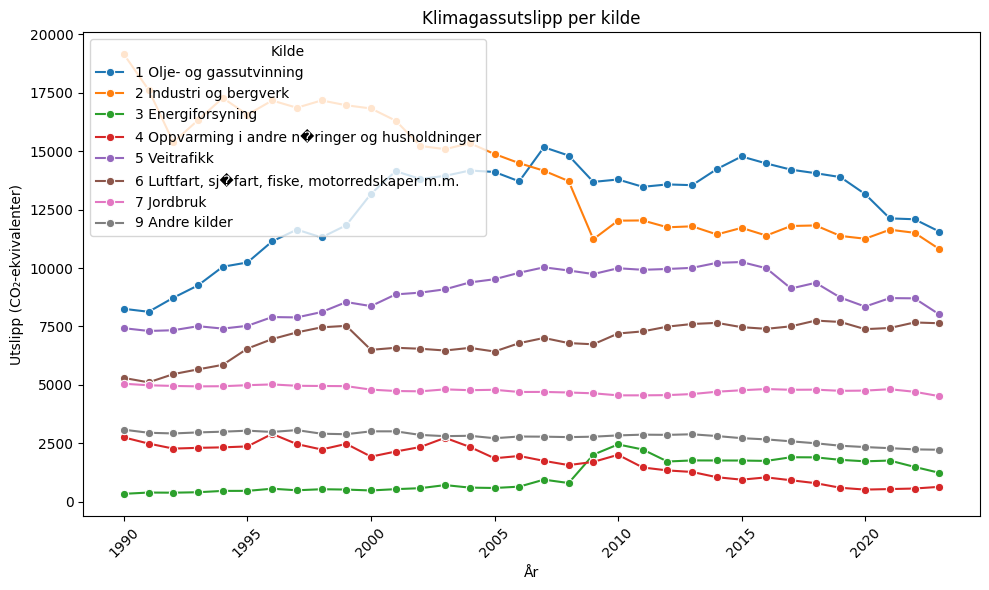

In [576]:
from klimagass_visualisering import plot_utslipp_per_kilde
plot_utslipp_per_kilde(df_norge_alt)

**Kommentar:**

Grafen viser at i perioden frem til 2005 var industri og bergverk den største kilden til utslipp i Norge. Etter 2005 tok olje- og gassutvinning over som største kilde, etter å ha økt utslippene betydelig fra 1990 til 2007. Olje- og gassutvinning har siden 2005 vært den sektoren som har hatt størst klimagassutslipp. De siste årene har derimot utslippene fra både industri og bergverk og olje- og gassutvinning gått ned.

Utslippene fra veitrafikk økte jevnt frem til rundt 2007, før det begynte å avta. Dette kan skyldes en økning av bruk av elbiler de siste årene. 

Oppvarming i andre næringer og husholdninger har etter 2003 hatt en nedgang. Dette kan komme av at det har blitt gjort endringer i hvordan bygninger varmes opp. Fossile varmekilder er byttet ut med elektrisitet og fjernvarme. 

Energiforsyning hadde en tydelig økning i utslipp rundt 2009–2010. Denne økningen skiller seg ut fra den ellers stabile utviklingen. Etter toppen i 2010 stabiliserte utslippet seg, og ligger nå på et lavere nivå. Det kan det være flere årsaker til en slik økningen. Det kan f.eks. ha vært lav vannkraftproduksjon eller økt etterspørsel etter energi i denne perioden, noe som har ført til en økning av bruk av fossile energikilder i strømproduksjonen.  

Luftfart, sjøfart, fiske, motorredskaper m.m har hatt en jevn økning i klimagassutslipp siden 2000. 

Jordbruk og "andre kilder" har hatt en mer stabil utvikling, men også her er det en svak nedgang de siste årene.

Totalt sett peker trenden mot at flere sektorer har klart å redusere utslippene sine, selv om det fortsatt er betydelige utslipp fra noen store kilder.


## Andel av klimagassutslipp per kilde i 2023

Diagrammet viser hvordan Norges totale klimagassutslipp i 2023 fordelte seg mellom de ulike sektorene.

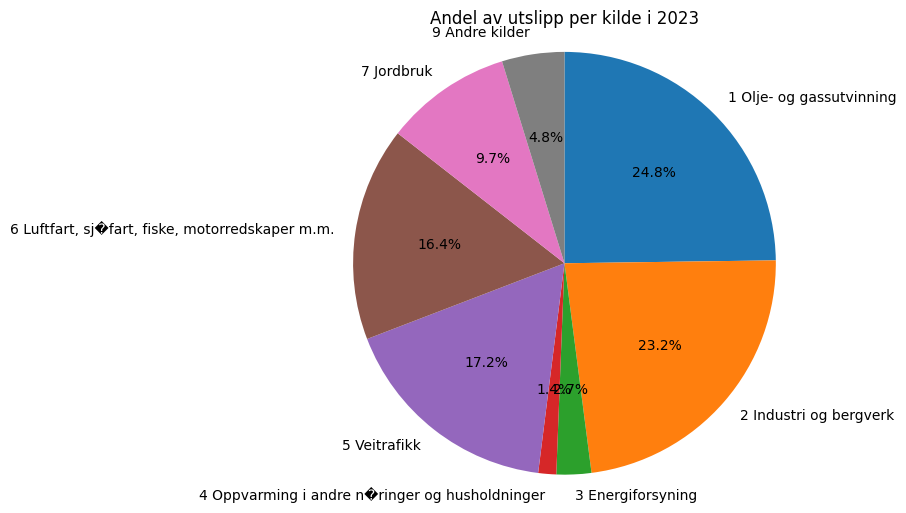

In [577]:
from klimagass_visualisering import plot_andel_per_kilde
plot_andel_per_kilde(df, år=2023)

**Kommentar:**

Olje- og gassutvinning og industri og bergverk sto for nesten halvparten av Norges totale klimagassutslipp i 2023. Veitrafikk, luftfart, sjøfart og motorredskaper utgjør også en betydelig andel, mens oppvarming, energiforsyning, jordbruk og andre kilder utgjør en mindre del.

## Klimagassutslipp i Norge per kilde og år (heatmap)

Heatmappen viser utviklingen av klimagassutslipp i Norge per kilde og år. Fargene viser størrelsen på utslippene -> Mørkere farger betyr høyere utslipp.

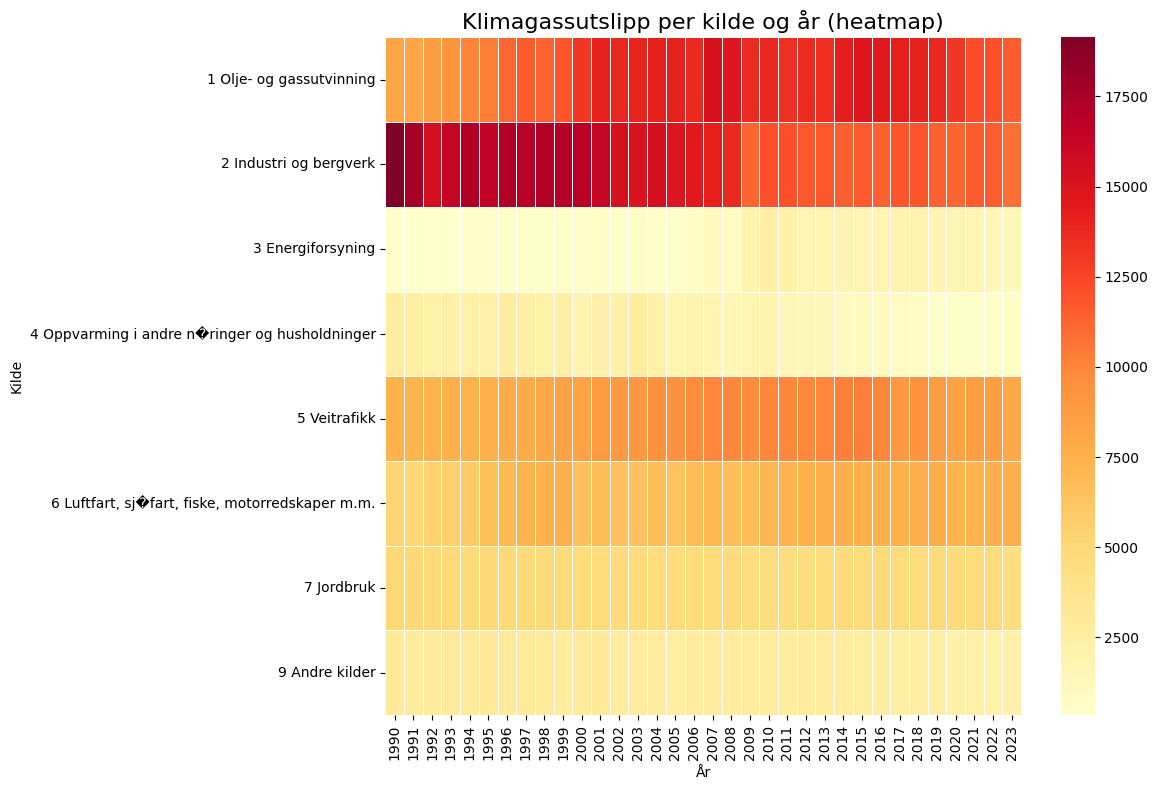

In [578]:
from klimagass_visualisering import plot_heatmap_per_kilde
plot_heatmap_per_kilde(df)

**Kommentar:**

Også her ser man tydlig at industri og bergverk hadde høye utslipp tidlig i perioden, men at utslippene har gått ned over tid. For olje- og gassutvinning viser grafen en vekst frem til midten av 2000-tallet, før utslippene avtar igjen.